<a href="https://colab.research.google.com/github/ancestor9/Data-Analyst-with-Gemini-/blob/main/6%EC%9D%BC%EC%B0%A8/seminar_note_1_0_load_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [1]:
import warnings # 파이썬 버전에 따른 오류 출력 방지
warnings.filterwarnings('ignore')

import pandas as pd # pandas
import numpy as np # numphy
import matplotlib.pyplot as plt # 시각화 matplob
import seaborn as sns; sns.set() # 시각화 seaborn

## 데이터 현황파악 script

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:

df = pd.DataFrame(housing.data, columns=housing.feature_names)

pd.DataFrame({'자료 내용(contents)':{col:df[col].unique() for col in df},
              '데이터형태(dtypes)':{col:df[col].dtype for col in df},
              '고유값 수(nunique)':{col:len(df[col].unique()) for col in df},
              '결측치 비율(%)':{col:str(round(sum(df[col].isna())/len(df),2))+'%' for col in df},
              '중복건수':{col:sum(df[col].duplicated()) for col in df},
              'nan 비율':{col:int(df[df[col] == 'nan'].shape[0]/len(df)*100) for col in df}
             })

,자료 내용(contents),데이터형태(dtypes),고유값 수(nunique),결측치 비율(%),중복건수,nan 비율
MedInc,"[8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.036...",float64,12928,0.0%,7712,0
HouseAge,"[41.0, 21.0, 52.0, 42.0, 50.0, 40.0, 49.0, 48....",float64,52,0.0%,20588,0
AveRooms,"[6.984126984126984, 6.238137082601054, 8.28813...",float64,19392,0.0%,1248,0
AveBedrms,"[1.0238095238095237, 0.9718804920913884, 1.073...",float64,14233,0.0%,6407,0
Population,"[322.0, 2401.0, 496.0, 558.0, 565.0, 413.0, 10...",float64,3888,0.0%,16752,0
AveOccup,"[2.5555555555555554, 2.109841827768014, 2.8022...",float64,18841,0.0%,1799,0
Latitude,"[37.88, 37.86, 37.85, 37.84, 37.83, 37.82, 37....",float64,862,0.0%,19778,0
Longitude,"[-122.23, -122.22, -122.24, -122.25, -122.26, ...",float64,844,0.0%,19796,0


## 1. Toy dataset

In [6]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [7]:
housing.data[0:1]

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [9]:
housing.target[0:10]

array([4.526, 3.585, 3.521, 3.413, 3.422, 2.697, 2.992, 2.414, 2.267,
       2.611])

In [10]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [11]:
df= pd.DataFrame(housing.data, columns=housing.feature_names)
df['target']= housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 2.	Real world datasets

In [13]:
from sklearn.datasets import fetch_20newsgroups
newsgroups= fetch_20newsgroups()
newsgroups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [14]:
df= pd.DataFrame(newsgroups.data, columns=['contents'])
df['target']= newsgroups.target
df.head()

,contents,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [15]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [16]:
newsgroups_train.target.shape

(11314,)

In [17]:
newsgroups_test = fetch_20newsgroups(subset='test')
newsgroups_test.target.shape

(7532,)

## 3. Open ML datasets

In [18]:
from sklearn.datasets import fetch_openml
data = fetch_openml(name='wine-quality-white')
data.url

'https://www.openml.org/d/40498'

In [19]:
data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [20]:
df = pd.DataFrame(np.c_[data.data, data.target], columns= data.feature_names + ['target'])
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,4
1,6.3,0.3,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,4
2,8.1,0.28,0.4,6.9,0.05,30.0,97.0,0.9951,3.26,0.44,10.1,4
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.4,9.9,4
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.4,9.9,4


## 3.	Generated datasets

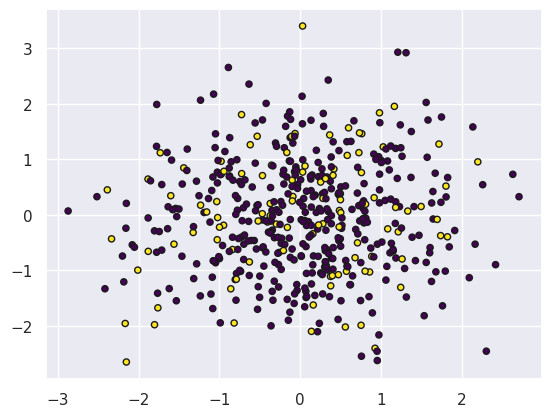

In [21]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=500, n_classes=2, weights=[0.8, 0.2],
                          random_state=1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='viridis', edgecolor='k')

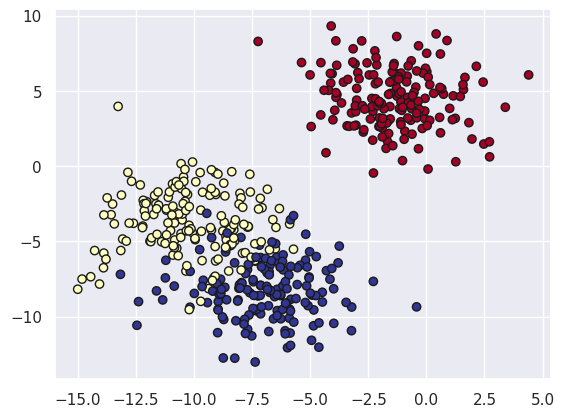

In [22]:
from sklearn.datasets import make_moons, make_circles, make_blobs
X, y = make_blobs(n_samples=500, centers=3,
                  n_features=2, cluster_std=2, random_state=1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolor='k')

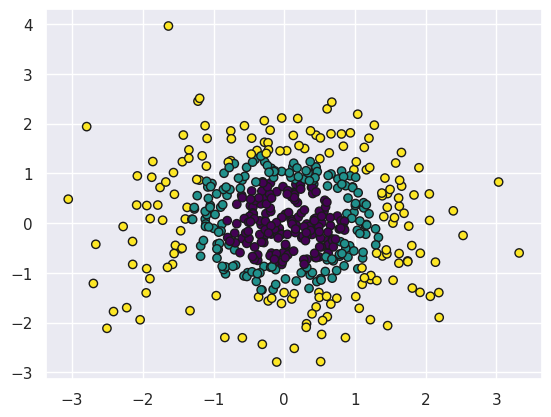

In [23]:
from sklearn.datasets import make_gaussian_quantiles
X, y = make_gaussian_quantiles(n_samples=500, n_features=2, n_classes=3, random_state=1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')

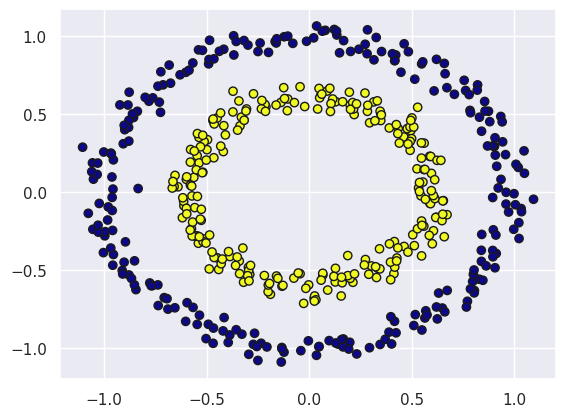

In [24]:
X, y = make_circles(n_samples=500, factor=.6, noise=.05)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma', edgecolor='k')

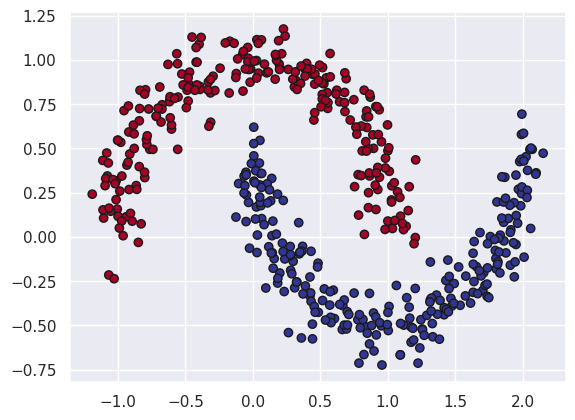

In [25]:
X, y = make_moons(n_samples=500, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolor='k')

In [26]:
df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], target=y))
df.describe()

,x1,x2,target
count,500.000000,500.000000,500.000000
mean,0.508926,0.255643,0.500000
std,0.877719,0.503781,0.500501
min,-1.190577,-0.723264,0.000000
25%,-0.048269,-0.177465,0.000000
50%,0.500162,0.266923,0.500000
75%,1.117276,0.725388,1.000000
max,2.151569,1.174344,1.000000


In [27]:
from sklearn.datasets import load_wine
data = load_wine()
df = pd.DataFrame(np.c_[data.data, data.target], columns= data.feature_names + ['target'])
df= df[['flavanoids','color_intensity', 'target']]
df.head()

,flavanoids,color_intensity,target
0,3.06,5.64,0.0
1,2.76,4.38,0.0
2,3.24,5.68,0.0
3,3.49,7.80,0.0
4,2.69,4.32,0.0


<Axes: xlabel='flavanoids', ylabel='color_intensity'>

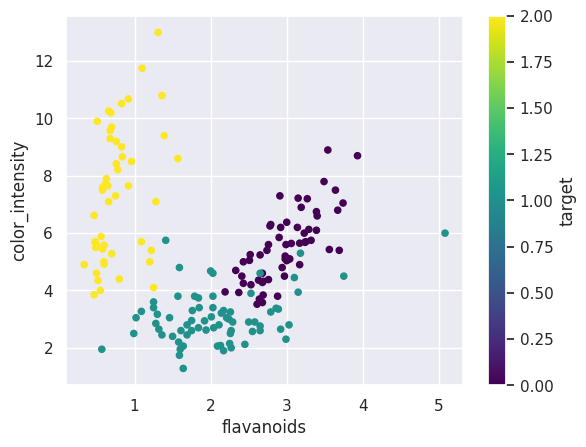

In [28]:
df.plot.scatter('flavanoids','color_intensity',c='target', cmap='viridis')

In [29]:
df.groupby('target').mean().round(2)
X = df.groupby('target').mean().values
y = df.target.unique()  # classes of each sample

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X,y)
clf.predict([[3, 6]])

array([0.])

In [31]:
X= df.drop('target', axis=1)
y= df.target
y_pred = clf.predict(X)
(y_pred == y).mean()
from sklearn.metrics import accuracy_score # 사이킷런의 정확도 산출 모듈
accuracy_score(y_pred, y)

0.8820224719101124

In [32]:
X= df.drop('target', axis=1)
y = df.target
clf = RandomForestClassifier(random_state=0)
clf.fit(X,y)
y_pred = clf.fit(X,y).predict(X)
accuracy_score(y_pred, y)

1.0

# End